### 데이터셋 불러오기

- root : train/test 데이터가 저장되는 경로
- train : 학습용 또는 테스트용 데이터셋 여부 지정(True면 학습용, False면 테스트용)
- download=True : root에 데이터가 없는 경우 인터넷에서 다운로드
- transform : 특징(feature) 변형 지정
- target_transform : 정답(label) 변형 지정

In [2]:
import torch

from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [4]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor() # numpy 이미지에서 torch 이미지로 축 변환
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### 데이터셋 순회 및 시각화

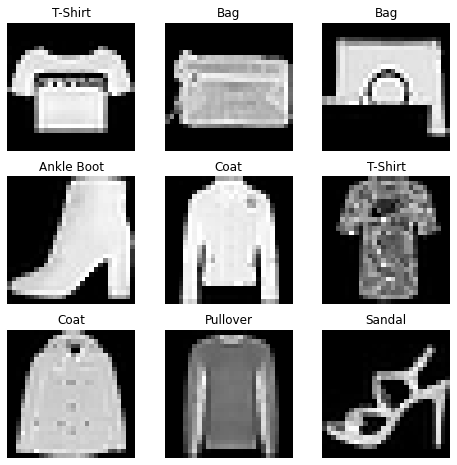

In [6]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()

### 사용자 정의 Dataset 생성

사용자 정의 Dataset 클래스는 반드시 __init__, __len__, __getitem__ 함수를 구현해야 함

In [7]:
import pandas as pd

from torchvision.io import read_image

In [9]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.lmg_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        
        if self.transform:
            image = self.transform(image)
        
        if self.target_transform:
            label = self.target_transform(label)
        
        return image, label

- __init__   
Dataset 객체가 생성(instantiate)될 때 한 번만 실행됨 -> 이미지와 주석 파일이 포함된 디렉토리와 두 가지 변형 초기화   
   
   
- __len__   
데이터셋의 샘플 개수 반환   
   
   
- __getitem__   
주어진 인덱스(idx)에 해당하는 샘플을 데이터셋에서 불러오고 반환. 인덱스를 기반으로 디스크에서 이미지의 위치를 식별하고 read_image를 사용하여 이미지를 텐서로 변환하고 self.img_labels의 csv 데이터로부터 해당하는 정답을 가져오고 (해당하는 경우) 변형 함수들을 호출한 뒤, 텐서 이미지와 라벨을 Python dict형으로 반환

### Dataloader로 학습용 데이터 준비하기

In [10]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)